# preset  

In [105]:
#preset1 - 패키지 opt1 - 구글드라이브에 설치하기
import os, sys
from google.colab import drive

#preset1 -  Colab Notebooks 안에 .env 폴더에 패키지 저장 ( 심볼링 링크가 작동 안된다. )
"""
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/_ColabNotebooks/.env', my_path) # 기존 path를 바꿔치기
sys.path.insert(0, my_path)
"""
#preset1 -  Dependency - 위 preinstall 작업을 안하면, 세션 할당시 매번 install
"""
!pip install --target=$my_path finance_datareader
"""

#preset1 - 패키지 opt2 - 매번 설치하기

!pip install finance_datareader

#preset -  my_data있는 드라이브 마운트
drive.mount('/content/drive')
prefix_path = "/content/drive/My Drive/_ColabNotebooks/"


import pandas as pd
import numpy as np

#preset - 주피터 노트북 여러줄 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#preset - pandas
pd.set_option("display.float_format",lambda x: '%.3f'%x) # 소수점 6자리 > 3자리만 보여달라
pd.set_option("max_columns",None) # 컬럼을 ... 으로 요약하지 마라 ( row는 요약되어있다.)
# pd.DataFrame(np.random.randn(1000,300))

"\ndrive.mount('/content/drive')\nmy_path = '/content/notebooks'\nos.symlink('/content/drive/My Drive/_ColabNotebooks/.env', my_path) # 기존 path를 바꿔치기\nsys.path.insert(0, my_path)\n"

'\n!pip install --target=$my_path finance_datareader\n'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DataFrame에 data row 추가하기

## `loc[]`을 사용하여 추가하기
- loc = 추가할 위치를 가르킨다.
- dict으로 columns key값 얼라인 해서 주기
- list로 크기 맞춰서 추가하기

In [106]:
df = pd.DataFrame(columns=['a', 'b'])
df.head()

,a,b


### Add data as 'list'

In [107]:
# df.loc[0] # get operation
df.loc[0] = [1, 2]  # set operation
df.head()

,a,b
0,1,2


In [108]:
df.loc['ㅋㅋ'] = [1, 2]
df.head()

,a,b
0,1,2
ㅋㅋ,1,2


### Add data as 'dict'

In [109]:
df.loc[len(df)] = {'b' : 'ㅎ', 'a': 'ㅋ'}
df.head()

,a,b
0,1,2
ㅋㅋ,1,2
2,ㅋ,ㅎ


### Add data as 'Series'

In [110]:
df.loc["yay"] = pd.Series({'a': 'ㅋ', 'b' : 'ㅎ'})
df.tail()

,a,b
0,1,2
ㅋㅋ,1,2
2,ㅋ,ㅎ
yay,ㅋ,ㅎ


In [111]:
# 이미 존재한는 index에 넣기 
df.loc["yay"] = pd.Series({'a': '1111', 'b' : '2222'})
df.tail()

,a,b
0,1,2
ㅋㅋ,1,2
2,ㅋ,ㅎ
yay,1111,2222


- 위 방법들은 다 inplace 방식  (Upsert)
  * 존재하면 덮어 씌운다.
  * 존재하지 않으면 새로 만든다.   

- 기존의 데이터가 손상된다.(결국!)


## `append()` 사용하여 추가하기

- 위의 `loc`과는 다르게 not in-place(returns a new copy of the DataFrame)

- `append()` : it only accecpt
    - DataFrame
    - Series
    - Dictionary
    - list of these(**Not `list` itself**)

In [112]:
names_df = pd.DataFrame(
    {
        'Name':['철수', '영희', '영수', '영미'],
        'Age':[12, 13, 14, 15]
    },
    index = ['Canada', 'Canada', 'USA', 'USA']
)
names_df

,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15


In [113]:
# Error (에러내용 확인!) => index를 뭐로 설정해야될지 모르기 때문
# names_df.append(
#     {'Name':'명수', 'Age':1}
# )

### `ignore_index=True`

- 이전 index를 다 reset한다

In [114]:
names_df.append( 
    {'Name':'명수', 'Age':100},
    ignore_index=True
)

,Name,Age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,100


In [115]:
# 리스트 of 딕셔너리로도 전달 가능
names_df.append(
    [
        {'Name':'명수', 'Age':1},
        {'Name':'동수', 'Age':2}
    ], 
    ignore_index=True
)

,Name,Age
0,철수,12
1,영희,13
2,영수,14
3,영미,15
4,명수,1
5,동수,2


In [116]:
# append()는 내부적으로 copy()를 하기 때문에, 원본은 그대로 유지
names_df

,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15


### Original index 유지하기 => `append()` 할 때, `dict`대신에 `Series`를 전달하면 됨

- 참고: `Series`를 `append`를 할 때는, `Series`의 index가 target DataFrame의 column이 되고, name이 target DataFrame의 index가 됨

In [117]:
# 특이하게 index가 df의 index에 매핑되는것이 아닌 컬럼에 매핑 된다. ✅
# `name` arg를 통해서 Series의 name을 부여하기
s = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names_df))
s

Name    Zach
Age        3
Name: 4, dtype: object

In [118]:
names_df.append(s)

,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15
4,Zach,3


In [119]:
# 리스트 of Series로도 전달 가능
s1 = pd.Series({'Name': 'Zach', 'Age': 3}, name=len(names_df))
s2 = pd.Series({'Name': 'Zayd', 'Age': 2}, name='USA')
names_df.append([s1, s2])
# 결과적으로 row를 추가하게 된다.

,Name,Age
Canada,철수,12
Canada,영희,13
USA,영수,14
USA,영미,15
4,Zach,3
USA,Zayd,2


- 참고: Series의 `name`은 어떤 operation을 하느냐에 따라서, index or column이 될 수 있음

In [120]:
# 시리즈의 인덱스가 df의 인덱스에 매핑될 수 있다!
# 컬럼 증가
pd.concat([s1, s2], axis=1)

,4,USA
Name,Zach,Zayd
Age,3,2


# concat, join, and merge 

## `concat()` 

- DataFrame or Series object를 수직적으로 or 수평적으로 '연결'
- **index(or columns)**에 대해 algin (not values)
- Defaults to `outer` join
    - operation axis에 따라 concat되는 object의 column or index가 union됨

- 예제

In [121]:
import FinanceDataReader as fdr

In [122]:
samsung_df = fdr.DataReader('005390', '2009-01-01', '2017-12-31')
kodex_df = fdr.DataReader('069500', '2016-01-01', '2017-12-31')

In [123]:
samsung_df.head(2)
kodex_df.head(2)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-04,21890,21899,21516,21525,6928106,-0.020
2016-01-05,21474,21728,21474,21660,12419517,0.006


In [124]:
# 데이터 프레임을 리스트로 감싸서, 위아래로 연장된다.
# concat 은 default가 axis=0 이므로 
# 데이터의 경계가 없다. -> 멀티 인덱스가 필요한 시점!
pd.concat(
    [samsung_df, kodex_df]
) 

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047
2009-01-06,210,234,210,212,2144,-0.049
2009-01-07,214,220,208,216,2434,0.019
2009-01-08,216,220,200,215,2280,-0.005
...,...,...,...,...,...,...
2017-12-21,30523,30579,30002,30006,8563000,-0.019
2017-12-22,30085,30216,30010,30151,8482482,0.005
2017-12-26,30213,30395,30024,30029,7603311,-0.004


- Column, Index alignment 특징은 그대로 적용됨!

In [125]:
kodex_df[['Open', 'Close']].head()

,Open,Close
Date,,
2016-01-04,21890,21525
2016-01-05,21474,21660
2016-01-06,21651,21503
2016-01-07,21449,21297
2016-01-08,21166,21448


In [126]:
# 특정 컬럼만 붙는다.
# 상위는 DF는 풀데이터 이지만, 하위 데이터는 2개 컬럼밖에 없으므로, 나머진 nan로 채워짐
pd.concat(
    [
        samsung_df, 
        kodex_df[['Open', 'Close']]
    ]
).tail(2)   # head()도 한번 실행해보세요!

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-12-27,30127,nan,nan,30381,nan,nan
2017-12-28,30391,nan,nan,30763,nan,nan


- `keys`, `names` args
- 데이터의 경계가 없으므로, 멀티 인덱스를 만들기 위함

In [127]:
# concat을 동일하게 하는데, keys값을 준다.
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'], 
).head()

Open  High  Low  Close  Volume  Change
   Date                                              
삼성 2009-01-02   200   234  200    234    2122   0.083
   2009-01-05   229   234  213    223    6890  -0.047
   2009-01-06   210   234  210    212    2144  -0.049
   2009-01-07   214   220  208    216    2434   0.019
   2009-01-08   216   220  200    215    2280  -0.005

In [128]:
# 멀티 인덱스에 이름 부여
# reset_index 시 인덱스가 설정되는 장점이 있다.
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'],
    names=['종목명']
).head()

Open  High  Low  Close  Volume  Change
종목명 Date                                              
삼성  2009-01-02   200   234  200    234    2122   0.083
    2009-01-05   229   234  213    223    6890  -0.047
    2009-01-06   210   234  210    212    2144  -0.049
    2009-01-07   214   220  208    216    2434   0.019
    2009-01-08   216   220  200    215    2280  -0.005

In [129]:
pd.concat(
    [samsung_df, kodex_df],
    keys=['삼성', 'KODEX200'],
    names=['종목명', '날짜']
).head()

Open  High  Low  Close  Volume  Change
종목명 날짜                                                
삼성  2009-01-02   200   234  200    234    2122   0.083
    2009-01-05   229   234  213    223    6890  -0.047
    2009-01-06   210   234  210    212    2144  -0.049
    2009-01-07   214   220  208    216    2434   0.019
    2009-01-08   216   220  200    215    2280  -0.005

- On `axis` = 1  
- 옆으로붙이는 경우 인덱스 얼라인 먼트가 적용된다.
- outter join 그 자체

In [130]:
pd.concat([samsung_df, kodex_df], axis=1).head()

,Open,High,Low,Close,Volume,Change,Open,High,Low,Close,Volume,Change
Date,,,,,,,,,,,,
2009-01-02,200,234,200,234,2122,0.083,nan,nan,nan,nan,nan,nan
2009-01-05,229,234,213,223,6890,-0.047,nan,nan,nan,nan,nan,nan
2009-01-06,210,234,210,212,2144,-0.049,nan,nan,nan,nan,nan,nan
2009-01-07,214,220,208,216,2434,0.019,nan,nan,nan,nan,nan,nan
2009-01-08,216,220,200,215,2280,-0.005,nan,nan,nan,nan,nan,nan


In [131]:
pd.concat([samsung_df, kodex_df], keys=['삼성', 'KODEX200'], axis=1).head(2)

삼성                               KODEX200                        \
           Open High  Low Close Volume Change     Open High Low Close Volume   
Date                                                                           
2009-01-02  200  234  200   234   2122  0.083      nan  nan nan   nan    nan   
2009-01-05  229  234  213   223   6890 -0.047      nan  nan nan   nan    nan   

                   
           Change  
Date               
2009-01-02    nan  
2009-01-05    nan

- `join`  argument
    - How to handle **indexes** on **other** axis(es). 즉, concat의 대상이 되는(=명시되는) axis 말고, 다른 axis에 대해 어떻게 join할 것인가

- inner join 시 동일한 Index만 살린다.

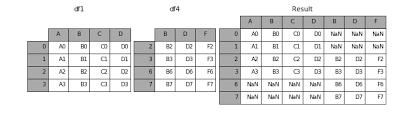

In [132]:
# default 'outer' join
pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex'], axis=1, names=['종목명']).head()
# 기간이 없는 부분은 nan

종목명          삼성                               kodex                        \
           Open High  Low Close Volume Change  Open High Low Close Volume   
Date                                                                        
2009-01-02  200  234  200   234   2122  0.083   nan  nan nan   nan    nan   
2009-01-05  229  234  213   223   6890 -0.047   nan  nan nan   nan    nan   
2009-01-06  210  234  210   212   2144 -0.049   nan  nan nan   nan    nan   
2009-01-07  214  220  208   216   2434  0.019   nan  nan nan   nan    nan   
2009-01-08  216  220  200   215   2280 -0.005   nan  nan nan   nan    nan   

종목명                
           Change  
Date               
2009-01-02    nan  
2009-01-05    nan  
2009-01-06    nan  
2009-01-07    nan  
2009-01-08    nan

In [133]:
# join = inner (date intersection)
pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex'], axis=1, names=['종목명'], join='inner').head()
# 데이터가 있는것만

종목명           삼성                                    kodex                \
            Open  High   Low Close   Volume Change   Open   High    Low   
Date                                                                      
2016-01-04  1470  1485  1430  1430   862249 -0.017  21890  21899  21516   
2016-01-05  1405  1440  1400  1400   844949 -0.021  21474  21728  21474   
2016-01-06  1415  1435  1390  1400  1061873  0.000  21651  21674  21385   
2016-01-07  1405  1415  1350  1350  1184923 -0.036  21449  21529  21237   
2016-01-08  1315  1365  1290  1360   886329  0.007  21166  21460  21119   

종목명                                 
            Close    Volume Change  
Date                                
2016-01-04  21525   6928106 -0.020  
2016-01-05  21660  12419517  0.006  
2016-01-06  21503  10875053 -0.007  
2016-01-07  21297  11213386 -0.010  
2016-01-08  21448  12256496  0.007

In [134]:
# concat 방향이 axis=0이니까, axis=1에 대해서 join이 적용됨
pd.concat([samsung_df.head(), kodex_df[['Close']].head()], join='inner')
# 조인 방식이 inner라서 공통된 컬럼인 close만 나온것을 볼 수 있다.

,Close
Date,
2009-01-02,234
2009-01-05,223
2009-01-06,212
2009-01-07,216
2009-01-08,215
2016-01-04,21525
2016-01-05,21660
2016-01-06,21503
2016-01-07,21297


- 주의 : `outer` join & column 명이 서로 겹치는 게 없을 때 ! => alignment 가 일치하는게 없으니 NaN으로 메꾼다!

In [135]:
samsung_diff_col_df = samsung_df.copy()
samsung_diff_col_df.columns = ['1_' + col  for col in samsung_df.columns]
samsung_diff_col_df.head()

,1_Open,1_High,1_Low,1_Close,1_Volume,1_Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047
2009-01-06,210,234,210,212,2144,-0.049
2009-01-07,214,220,208,216,2434,0.019
2009-01-08,216,220,200,215,2280,-0.005


In [136]:
samsung_df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2009-01-02,200,234,200,234,2122,0.083
2009-01-05,229,234,213,223,6890,-0.047
2009-01-06,210,234,210,212,2144,-0.049
2009-01-07,214,220,208,216,2434,0.019
2009-01-08,216,220,200,215,2280,-0.005


In [137]:
pd.concat([samsung_diff_col_df, kodex_df]).head()
# 일치하는 컬럼이 없으니 데이터가 2분면 -> 4분면 에만 존재하게 된다.

,1_Open,1_High,1_Low,1_Close,1_Volume,1_Change,Open,High,Low,Close,Volume,Change
Date,,,,,,,,,,,,
2009-01-02,200.000,234.000,200.000,234.000,2122.000,0.083,nan,nan,nan,nan,nan,nan
2009-01-05,229.000,234.000,213.000,223.000,6890.000,-0.047,nan,nan,nan,nan,nan,nan
2009-01-06,210.000,234.000,210.000,212.000,2144.000,-0.049,nan,nan,nan,nan,nan,nan
2009-01-07,214.000,220.000,208.000,216.000,2434.000,0.019,nan,nan,nan,nan,nan,nan
2009-01-08,216.000,220.000,200.000,215.000,2280.000,-0.005,nan,nan,nan,nan,nan,nan


### 실전예제: concat을 이용해서 close 데이터만 뽑아내기

In [138]:
total_df = pd.concat([samsung_df, kodex_df], keys=['삼성', 'kodex200'], names=['종목명'])
total_df.head()
total_df.tail()

Open  High  Low  Close  Volume  Change
종목명 Date                                              
삼성  2009-01-02   200   234  200    234    2122   0.083
    2009-01-05   229   234  213    223    6890  -0.047
    2009-01-06   210   234  210    212    2144  -0.049
    2009-01-07   214   220  208    216    2434   0.019
    2009-01-08   216   220  200    215    2280  -0.005

Open   High    Low  Close    Volume  Change
종목명      Date                                                    
kodex200 2017-12-21  30523  30579  30002  30006   8563000  -0.019
         2017-12-22  30085  30216  30010  30151   8482482   0.005
         2017-12-26  30213  30395  30024  30029   7603311  -0.004
         2017-12-27  30127  30376  30066  30381  12654745   0.012
         2017-12-28  30391  30790  30386  30763   7560958   0.013

In [139]:
total_df = total_df.reset_index()
total_df.head()
# 멀티 레벨 인덱스가 들어왔다.

,종목명,Date,Open,High,Low,Close,Volume,Change
0,삼성,2009-01-02,200,234,200,234,2122,0.083
1,삼성,2009-01-05,229,234,213,223,6890,-0.047
2,삼성,2009-01-06,210,234,210,212,2144,-0.049
3,삼성,2009-01-07,214,220,208,216,2434,0.019
4,삼성,2009-01-08,216,220,200,215,2280,-0.005


In [140]:
# 
total_df.pivot(index='Date', columns='종목명', values='Close')

종목명,kodex200,삼성
Date,,
2009-01-02,nan,234.000
2009-01-05,nan,223.000
2009-01-06,nan,212.000
2009-01-07,nan,216.000
2009-01-08,nan,215.000
...,...,...
2017-12-21,30006.000,1050.000
2017-12-22,30151.000,1050.000
2017-12-26,30029.000,1060.000


- `pivot()` 예시
- 정말 많이 사용하는 함수다

In [141]:
sample_data = pd.DataFrame(
    {
        "종목명":["삼성", "현대", "하이닉스", "삼성", "현대", "하이닉스"],
        "datetime":["2019-01-01", "2019-01-01", "2019-01-01", "2019-01-02", "2019-01-02", "2019-01-02"],
        "price":[1,2,3, 4,5,6]
    }
)
sample_data
# 이러한 샘플 데이터를 만들고 종목명으로 소팅해보자

,종목명,datetime,price
0,삼성,2019-01-01,1
1,현대,2019-01-01,2
2,하이닉스,2019-01-01,3
3,삼성,2019-01-02,4
4,현대,2019-01-02,5
5,하이닉스,2019-01-02,6


In [142]:
sample_data.sort_values("종목명")

,종목명,datetime,price
0,삼성,2019-01-01,1
3,삼성,2019-01-02,4
2,하이닉스,2019-01-01,3
5,하이닉스,2019-01-02,6
1,현대,2019-01-01,2
4,현대,2019-01-02,5


In [143]:
sample_data.pivot(index="datetime", columns="종목명", values="price")
# 피봇은 인덱스,컬럼,벨류 3가지 인자를 받는다.
# 기존의 컬럼을 3가지 골라 새로운 테이블을 만든다.
# 종목명으로 그룹핑이 될 수 있고, 시간으로도 그룹핑이 될 수 있다.
# 그때 가격데이터가 1개씩 매칭이 된다면 피봇이 가능

종목명,삼성,하이닉스,현대
datetime,,,
2019-01-01,1,3,2
2019-01-02,4,6,5


## `join()`

- concat : 두 프레임을 붙이듯 그냥 연결해
- join : join on 이라는 붙일 기준을 줘야함  
eg) 장바구니_id,사용자_id,물품_id 테이블 있다고 가정,  
물품_id에 매칭해서 물품 카테고리 정보를 Join 추가가능  
사용자_id에 매칭해서 사용자 고객 등급 정보를 Join 가능  

- 2개의 (보통 index가 다른) dataframe을 하나의 dataframe으로 합칠 때 사용
- Aligns the calling DataFrame's **column(s) or index** with the other DataFrame's **index** 
    1. index - index
    2. columns - index (calling object는 column, called object는 index)
        - `on` arg = calling object의 column
            - called object의 index를 calling object의 "어떤 column"에 맞출것인가 
        - `set_index()` 후,  `on`없이 index-index join과 같은 결과 
- Cartesian product joining
- Defaults to `left` join
- 대부분의 경우 merge랑 호환 가능

- 예제1

In [144]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index=['K0', 'K1', 'K2']) 

In [145]:
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index=['K0', 'K2', 'K3'])

In [146]:
left
right

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [147]:
left.join(right) # left join 기본

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [148]:
left.join(right, how='outer') # outter 조인

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- 예제2

In [149]:
left = pd.DataFrame(
    {
        'A':['A0', 'A1', 'A2', 'A3'],
        'B':['B0', 'B1', 'B2', 'B3'],
        'key':['K0', 'K1', 'K0', 'K1'],
    }
)
right = pd.DataFrame(
    {
        'C':['C0', 'C1'],
        'D':['D0', 'D1'],
    },
    index=['K0', 'K1']
)
left
right

,A,B,key
0,A0,B0,K0
1,A1,B1,K1
2,A2,B2,K0
3,A3,B3,K1


,C,D
K0,C0,D0
K1,C1,D1


- 아래 둘은 결과 같음

In [150]:
# left.join(right, on='key')
left.join(right, on='key').set_index("key")
# left쪽의 key 컬럼과 - right쪽읜 Index가 얼라인 된다.

,A,B,C,D
key,,,,
K0,A0,B0,C0,D0
K1,A1,B1,C1,D1
K0,A2,B2,C0,D0
K1,A3,B3,C1,D1


In [151]:
# left.set_index('key')
left.set_index('key').join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K0,A2,B2,C0,D0
K1,A1,B1,C1,D1
K1,A3,B3,C1,D1


- l_suffix, r_suffix

In [152]:
a = pd.DataFrame([1,2,3], index=['a','b','c'], columns=['안녕'])
b = pd.DataFrame([4,2,6], index=['a','c','d'], columns=['안녕'])
a
b
# sql에서 join하면 안녕이라는 동일 이름의 컬럼이 생기지만 여기서는 이를 방지할 옵션이 있다.

,안녕
a,1
b,2
c,3


,안녕
a,4
c,2
d,6


In [153]:
a.join(b, lsuffix="_x", rsuffix="_y", how="inner")
# 오리진 컬럼을 분류 할 수 있다.

,안녕_x,안녕_y
a,1,4
c,3,2


- 예제3 (앞의 lec1\_3에서 median_시가총액 연결하기)

In [154]:
a_df = pd.read_csv(prefix_path+"my_data/Small_and_Big.csv", index_col=[0])
a_df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원)
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000
2,2000-07-31,CJ ENM,6.560,nan,17.400,400467000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000
4,2000-07-31,CJ씨푸드,nan,0.227,32.000,1987000000.000


In [155]:
# eg)
# 시가총액의 중간값을 기준으로 작은 종목은 small,큰 종목은 big이라고 표기하기
# 데이터가 data별로 종목-시총 이렇게 구성되어있다.
# *aggregated된 데이터는 기존 데이터 보다 작다. 
median_df = a_df.groupby(['date']).agg({'시가총액 (보통)(평균)(원)': 'median'})
median_df.columns = ['시가총액_median']
median_df.head()

,시가총액_median
date,
2000-07-31,34947000000.000
2000-08-31,33684000000.000
2000-09-30,33684000000.000
2000-10-31,30523000000.000
2000-11-30,30798000000.000


In [156]:
joined_df = a_df.join(median_df, on="date")
joined_df.head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),시가총액_median
0,2000-07-31,BYC,0.210,0.479,-0.580,27786000000.000,34947000000.000
1,2000-07-31,CJ,0.510,1.166,-9.000,1160889000000.000,34947000000.000
2,2000-07-31,CJ ENM,6.560,nan,17.400,400467000000.000,34947000000.000
3,2000-07-31,CJ대한통운,0.170,1.314,-7.960,194962000000.000,34947000000.000
4,2000-07-31,CJ씨푸드,nan,0.227,32.000,1987000000.000,34947000000.000


In [157]:
joined_df[joined_df['date'] == "2000-08-31"].head()

,date,종목명,PBR(IFRS-연결),"베타 (M,5Yr)",수익률(%),시가총액 (보통)(평균)(원),시가총액_median
573,2000-08-31,BYC,0.220,0.477,3.500,27221000000.000,33684000000.000
574,2000-08-31,CJ,0.510,1.165,0.000,1052967000000.000,33684000000.000
575,2000-08-31,CJ ENM,6.730,nan,2.680,373822000000.000,33684000000.000
576,2000-08-31,CJ대한통운,0.190,1.312,7.040,189622000000.000,33684000000.000
577,2000-08-31,CJ씨푸드,nan,0.222,62.880,2765000000.000,33684000000.000


In [158]:
# Hint: 아래와 같은 느낌으로 하시면 됩니다.
# cond1 = joined_df['시가총액(보통~~)'] <  joined_df['시가총액_median']
# joined_df.loc[cond1, "small_or_big"] = "small"
# joined_df.loc[~cond1, "small_or_big"] = "big"

## `merge()`

- join과 똑같은데, 컬럼과 컬럼도 가능하다.

- Aligns the calling DataFrame's *column(s)* with the other DataFrame's *column(s)*
    - `left_index`, `right_index` argument도 존재하긴 함(index-index alignment시)
    - `join()`
        - 사실 내부적으로 `reset_index()` 하고 `merge()` 호출함
- Cartesian product joining
- Defaults to `inner` join
- `concat()`과 달리, index, column명이 아니라, value 값 자체를 이용한 join

In [159]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})
    
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

In [160]:
left
right

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [161]:
# default: inner join(교집합)
pd.merge(left, right, on=['key1', 'key2'])
# key1,key2를 기준으로 innner join 한 결과이다.
# k0k0는 잘 되었다, k0k1 은 한쪽만있어서 제거됨

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [162]:
# outer join(합집합)
pd.merge(left, right, how='outer', on=['key1', 'key2'])
# k0k0는 잘 되었다, k0k1 은 왼쪽만있어서 , 오른쪽은 nan으로 채워졌다.

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


In [163]:
pd.merge(left, right, how='right', on=['key1', 'key2'])
# k0k0는 잘 되었다, k0k1 은 왼쪽만있어서 , 오른쪽은 nan으로 채워지지 않고 제거되었다.

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [164]:
pd.merge(left, right, how='left', on=['key1', 'key2'])
# k0k0는 잘 되었다, k0k1 은 왼쪽만있어서 , 오른쪽은 nan으로 채워졌다. 반대로 오른쪽만 있으면 제거된다.

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- More about Cartesian product joining

In [165]:
left = pd.DataFrame({'A':[1,2,], 'B':[2,2]})
right = pd.DataFrame({'A':[4,5,6], 'B':[2,2,2]})
left
right

,A,B
0,1,2
1,2,2


,A,B
0,4,2
1,5,2
2,6,2


In [166]:
# left, right, inner, outer 결과가 다 같음
pd.merge(left, right, on="B", how='left')

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


- 예제

In [167]:
close_df = samsung_df['Close'].reset_index()
vol_df = samsung_df['Volume'].reset_index()

In [168]:
close_df.head()
vol_df.head()
# Date라는 공통된 컬럼을 기준으로 merge를 하고 싶다.

,Date,Close
0,2009-01-02,234
1,2009-01-05,223
2,2009-01-06,212
3,2009-01-07,216
4,2009-01-08,215


,Date,Volume
0,2009-01-02,2122
1,2009-01-05,6890
2,2009-01-06,2144
3,2009-01-07,2434
4,2009-01-08,2280


In [169]:
vol_df.iloc[:2]

,Date,Volume
0,2009-01-02,2122
1,2009-01-05,6890


In [170]:
# default is 'inner' join
pd.merge(close_df, vol_df.iloc[:2])   # 알아서 같은 column 이름끼리 맞춤

,Date,Close,Volume
0,2009-01-02,234,2122
1,2009-01-05,223,6890


In [171]:
# 'outer' join
pd.merge(close_df, vol_df.iloc[:2], how="outer").head(5)

,Date,Close,Volume
0,2009-01-02,234,2122.000
1,2009-01-05,223,6890.000
2,2009-01-06,212,nan
3,2009-01-07,216,nan
4,2009-01-08,215,nan


## join & merge 각각 언제 사용?

- index가 하나라도 관여하면 => `join()`
- 둘다 colum에 맞춰야하면 => `merge()`
- `merge()` 사용시, `left_index`, `right_index` 사용하면 `join()`과 결과가 같음
- `join()` 사용시 `reset_index()`하고, `merge()` 써도 됨

In [172]:
a = pd.DataFrame([1,2,3], index=['a','b','c'], columns=['안녕'])
b = pd.DataFrame([4,2,6], index=['a','c','d'], columns=['안녕'])
a
b

,안녕
a,1
b,2
c,3


,안녕
a,4
c,2
d,6


In [173]:
a.merge(b)
# on이 없어서, 안녕을 기준으로 inner join하게 된다.
# 2로 머지 되고, 다른 딸린 컬럼이 없어서 아래처럼 나오고, 인덱스를 초기화 된다.
# 얼라인에 맞출 value가 컬럼이므로 index는 더이상 필요가 없어진다.

,안녕
0,2


In [174]:
a.reset_index()

,index,안녕
0,a,1
1,b,2
2,c,3


In [175]:
a.reset_index().merge(b.reset_index())
# 

,index,안녕


In [176]:
a.merge(b, left_index=True, right_index=True)
# 인덱스를 사용해 merge를 하겠다.

,안녕_x,안녕_y
a,1,4
c,3,2


In [177]:
a.join(b, lsuffix="_x", rsuffix="_y", how="inner")
# inner join방식으로 index - index로 어라인 된다.

,안녕_x,안녕_y
a,1,4
c,3,2


### Concat과 join,merge와의 차이

In [178]:
a = pd.DataFrame({"a": [1,2,3],}, index=[1,2,3])
b = pd.DataFrame({"b": [1,4,5],}, index=[1,4,5])
a
b

,a
1,1
2,2
3,3


,b
1,1
4,4
5,5


In [179]:
pd.concat([a, b], axis=1)

,a,b
1,1.000,1.000
2,2.000,nan
3,3.000,nan
4,nan,4.000
5,nan,5.000


In [180]:
a = pd.DataFrame({"a": [1,2,3],}, index=[1,2,2])
b = pd.DataFrame({"b": [1,4,5],}, index=[1,4,5])
a
b

,a
1,1
2,2
2,3


,b
1,1
4,4
5,5


In [181]:
# error 발생! => concat()을 cartesian product가 불가능하기 때문에, 중복 index 혹은 column이 있는 경우 작동하지 못함
# pd.concat([a, b], axis=1)
# 인덱스2가 중복되었다 duplecated

# 실전예제

## flipkart

In [182]:
product_df = pd.read_csv(prefix_path+"my_data/product.csv", index_col=0)
review_df = pd.read_csv(prefix_path+"my_data/review.csv", index_col=0)

In [183]:
product_df.shape
review_df.shape

(474, 4)

(27008, 6)

In [184]:
product_df.head(2)
review_df.head(2)

,id,brand,title,price
0,384,apple,"apple iphone 6 (space grey, 32 gb)",23999.000
1,385,apple,"apple iphone 6s (space grey, 32 gb)",33999.000


,product__id,author,rating,title,content,date
0,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23


In [185]:
flipkart_df = pd.merge(
    product_df, 
    review_df, 

    left_on="id",
    right_on='product__id',
    
    how='right',    # Review에 있는 id, 즉 product__id를 기준으로 데이터를 생성합니다. 만약 "product" 정보가 반드시 존재하는 review들로만 데이터를 구성하고 싶으면 "left"로 하시면 됩니다.
)  

In [186]:
flipkart_df.shape
flipkart_df.head(2)

(27008, 10)

,id,brand,title_x,price,product__id,author,rating,title_y,content,date
0,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Subhankar Mishra,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,351,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,351,Chinmay Chopade,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23


In [187]:
# column을 제거 하기 위해서는 drop([컬럼1, 컬럼2, ..], axis=1)과 같은 방식으로 진행합니다
flipkart_df = flipkart_df.drop(['id', 'product__id', 'author'], axis=1)
flipkart_df.head(2)
# 필요없는 데이터를 드랍한다.

,brand,title_x,price,rating,title_y,content,date
0,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,5.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,2011-07-22
1,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,4.000,It does what it says !!!,I bought this phone and been using for last we...,2011-08-23


## Amazon

In [188]:
amazon_df = pd.read_csv(prefix_path+"my_data/amazon_review1.csv", index_col=0)
amazon_df.head(2)
# 플립커트의 상품정보와,리뷰가 있고, 아마존 리뷰도 있다.

,brand,title_x,price,title_y,content,rating
date,,,,,,
2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5
2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5


## 데이터 합치기

In [189]:
amazon_df.shape
flipkart_df.shape

(42190, 6)

(27008, 7)

In [190]:
df = pd.concat([amazon_df, flipkart_df], axis=0)   # `keys` argument를 활용하셔서 site를 구분하셔도 됩니다
df.shape
# 아마존과 플립커트 리뷰는 섞였다 물론 멀티레벨 인덱스로 구분해도 된다.

(69198, 7)

In [191]:
df.head()

,brand,title_x,price,title_y,content,rating,date
2013-06-25,apple,"apple iphone 5 (black-slate, 16gb)",14499.000,well an iphone is an iphone!,"Piece of art you like to keep holding onto, th...",5.000,NaN
2013-06-25,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,really a life companion device,I got my S4 few days back n this device is awe...,5.000,NaN
2013-06-29,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,A smartphone with a hulk's punch,"The Galaxy S4 is a great, great device in its ...",5.000,NaN
2013-07-01,samsung,samsung galaxy s3 gt-i9300 (pebble blue),31070.000,great,"awesome phone, upgraded from galaxy r, is much...",5.000,NaN
2013-07-04,samsung,"samsung galaxy s4 gt-i9500 (white frost, 16gb)",19439.000,AMAZON/UNIVERCEL NEVER,With great expectation with amazon India I had...,1.000,NaN


In [192]:
df['date'] = pd.to_datetime(df['date']) # 타입 변경
df['price'] = df['price'].astype(float) # 타입 변경

df.set_index('date', inplace=True) # inplace = 원본을 훼손한다.
df = df.loc[:"2017-12-31"]   # 비록 DatetimeIndex이지만, 날짜를 문자열 string으로 표현하여 loc을 이용한 range indexing이 가능합니다.

df.rename(columns={'title_x':'name', 'title_y':'title'}, inplace=True) #원본훼손

df['price_grp'] = pd.cut(df['price'], [0, 5000, 15000, 200000], labels=["저가", "중가", "고가"])

In [193]:
df.head()

,brand,name,price,title,content,rating,price_grp
date,,,,,,,
2011-07-22,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,AnyOne has ordered yet ?,Has anyone ordered yet ? Please tell us your e...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,It does what it says !!!,I bought this phone and been using for last we...,4.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Value for money,Excellent phone altogether. Only negative poin...,5.000,중가
2011-08-23,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,Good for Price and delivery speed....,Worth for the money..... How much you are payi...,5.000,중가
2011-09-15,micromax,"micromax a70 (cocoa brown, 160 mb)",7005.000,FLIPKART ROCKS,"i am a regular user of ebay india, and i usual...",5.000,중가


In [200]:
df.index # datetime객체, year만 뽑을 수 있다.

DatetimeIndex(['2011-07-22', '2011-08-23', '2011-08-23', '2011-08-23',
               '2011-09-15', '2011-09-15', '2011-09-17', '2011-09-25',
               '2011-09-27', '2011-10-13',
               ...
               '2017-12-20', '2017-12-22', '2017-12-22', '2017-12-22',
               '2017-12-23', '2017-12-26', '2017-12-26', '2017-12-27',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='date', length=22319, freq=None)

In [202]:
df.index.year
df.index.month
df.index.quarter

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='date', length=22319)

Int64Index([ 7,  8,  8,  8,  9,  9,  9,  9,  9, 10,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=22319)

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=22319)

## 전체제품 기간별 제품 평균가격

In [194]:
# 아래에서 보이시는 것처럼 groupby()의 인자에는 반드시 'column명'이 아니어도 됩니다.
# 아래 예제처럼 df라는 object로부터 추출할 수 있는(여기서는 df.index에서 추출한) categorical 변수들을 사용해도 됩니다.
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'})

price
date date          
2011 3     7005.000
     4     6564.214
2012 1     5837.250
     2     4456.945
     3     5203.164
     4     8851.987
2013 1     8228.694
     2    13098.951
     3    10574.770
     4    10106.358
2014 1     8955.434
     2     8895.550
     3     8969.058
     4    12091.026
2015 1    10409.730
     2    17200.320
     3    16498.556
     4    18839.613
2016 1    21684.773
     2    19896.658
     3    17594.872
     4    23765.043
2017 1    17576.598
     2    19595.137
     3    17528.829
     4    27268.716

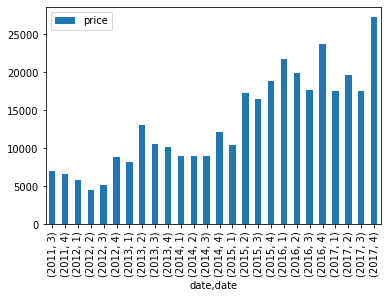

In [195]:
df.groupby([df.index.year, df.index.quarter]).agg({'price':'mean'}).plot(kind='bar')

In [196]:
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_

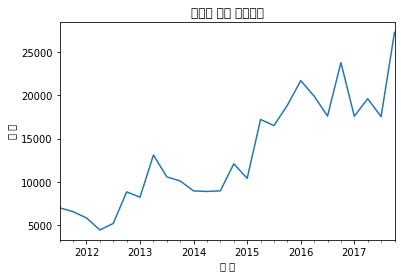

In [197]:
# resample 함수는, 
ax = df.resample("Q")['price'].mean().plot();

ax.set_title("기간별 제품 평균가격");
ax.set_xlabel("기 간");
ax.set_ylabel("가 격");

## 브랜드별 리뷰수

In [198]:
df.groupby(['brand']).agg({'name':'count'})

,name
brand,
apple,5399
mi,1558
micromax,8078
samsung,7284


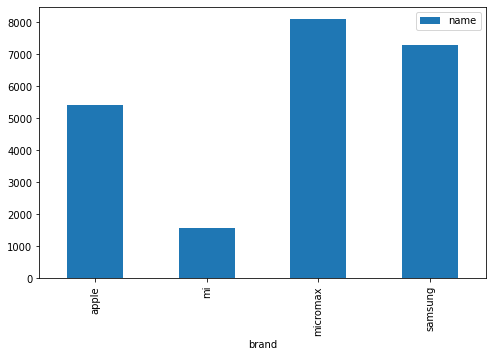

In [199]:
df.groupby(['brand']).agg({'name':'count'}).plot(kind='bar', figsize=(8,5));